In [1]:
# importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import xgboost as xgb
import lightgbm as lgbm
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
# abrir dataset

#dataset = pd.read_csv('D:\\archive\\features_kidney_cancer_VGG16.csv')
dataset = pd.read_csv("C:/Users/danie/Desktop/Projeto-SI2/DatasetFeatures_ResNet50_224x224/features_brain_cancer_ResNet50.csv")
#Arquivo muto grande erro ao abrir 

In [ ]:
# separar as colunas de dados e label

colunas_dados = []
for column in dataset.columns:
    if column != 'label':
        colunas_dados.append(column)
    else: 
        print("Achou")

X_full = dataset[colunas_dados]
Y_full = dataset['label']
X_full = np.array(X_full)
Y_full = np.array(Y_full)
np.random.shuffle(X_full)
np.random.shuffle(Y_full)

del dataset




Achou


In [ ]:
# Separa em conjunto de teste e treino
x_train, x_test, y_train, y_test = train_test_split(X_full,Y_full,random_state=42,test_size=0.3)

del X_full, Y_full


Accuracy:  0.22266666666666668


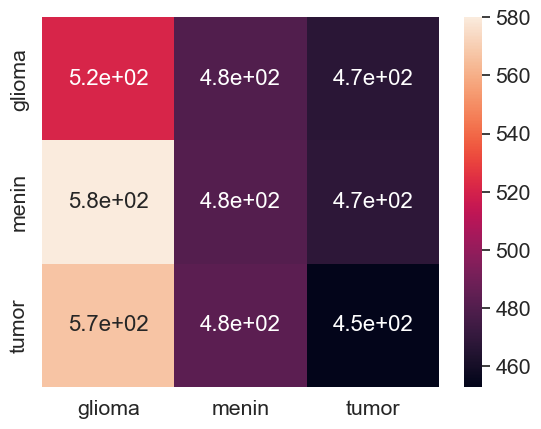

In [ ]:
# aplicar SVC
modelSVM = svm.SVC()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['glioma','menin','tumor'], yticklabels=['glioma','menin','tumor']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy:  0.21488888888888888


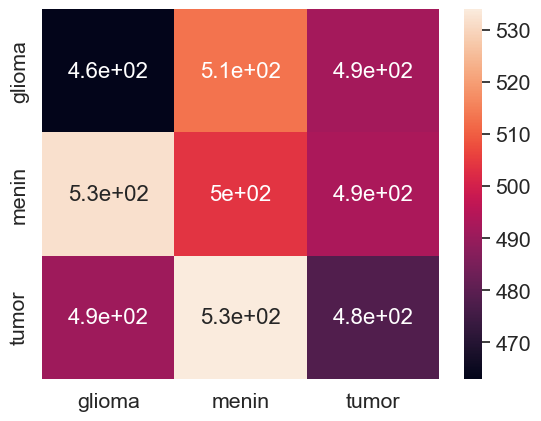

In [ ]:
# aplicar LSVC
modelSVM = svm.LinearSVC()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['glioma','menin','tumor'], yticklabels=['glioma','menin','tumor']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.21733333333333332


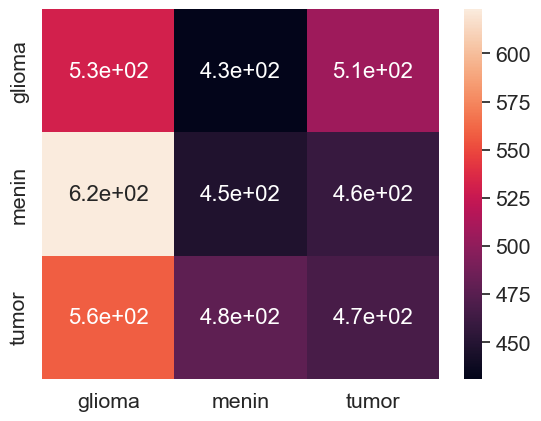

In [ ]:
# aplicar RF
modelSVM = RandomForestClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['glioma','menin','tumor'], yticklabels=['glioma','menin','tumor']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.338471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4003665
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 24021
[LightGBM] [Info] Start training from score -1.089511
[LightGBM] [Info] Start training from score -1.106933
[LightGBM] [Info] Start training from score -1.099470
Accuracy:  0.21844444444444444


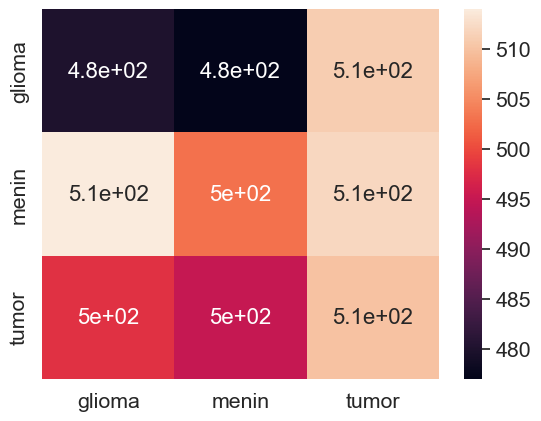

In [ ]:
# aplicar LGBM
modelSVM = lgbm.LGBMClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['glioma','menin','tumor'], yticklabels=['glioma','menin','tumor']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.22533333333333333


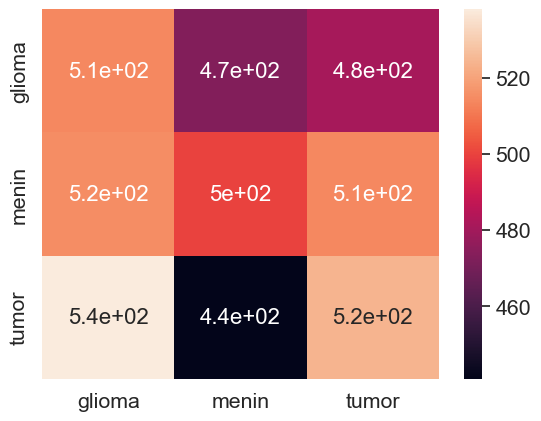

In [ ]:
# aplicar xgb
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
le.fit(y_train)
y_train_encoded = le.transform(y_train)
modelSVM = xgb.XGBClassifier()
modelSVM.fit(x_train,y_train_encoded)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test_encoded, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['glioma','menin','tumor'], yticklabels=['glioma','menin','tumor']) # font size

acc = (matConf[0][0] + matConf[1][1])/len(y_pred)
print("Accuracy: ", acc)